In [2]:
!pip install gymnasium
!pip install stable-baselines3
# !pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 1.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manyl

In [1]:
import numpy as np
import bms_env
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import random


from utils import *


# Import the necessary libraries
from stable_baselines3 import DQN
from stable_baselines3.common.env_checker import check_env

In [16]:
# bms = bms_env.BMSenv(num_cells= 2, k_tanh_params= [0.75, 1.5], Q_cells = [2.35, 2.35])
bms = bms_env.BMSenv(num_cells= 5, k_tanh_params= [0.8, 2.5, 0.5, 1.5, 2], Q_cells = [2.35, 1., 0.5, 3, 1.75])
bms = bms_env.BMSenv(num_cells= 50, k_tanh_params= np.random.uniform(0.75, 2.5, 50), Q_cells = np.random.uniform(0.5, 5, 50))

print(bms)

BMSenv(num_cells=50,
        k_tanh_params=[1.74267443 1.41653997 1.56330192 1.93399947 1.14945887 1.10347153
 2.33346521 1.27347727 1.44747557 2.3968313  1.57427852 2.48928901
 1.29155203 2.05391426 1.65809815 1.42414305 1.2133703  1.60243717
 1.15594448 1.34705908 1.35621718 0.84282487 1.31813428 1.87141871
 2.00394409 2.08447313 2.201931   1.71371391 0.98906567 2.45255529
 2.28223798 2.34735145 1.28591731 1.30952047 1.50325797 2.4203584
 1.9871353  1.51047616 0.76178289 1.1090105  1.86289287 1.54519135
 1.91798477 1.18412707 1.61382476 1.82831496 2.23232268 1.81079521
 1.24770342 1.3028549 ],
        Q_cells=[0.67971181 2.20758233 1.3525281  1.1292542  4.62222809 3.61144537
 1.54442732 2.56613898 3.02435653 0.85791228 2.61979495 1.44127551
 4.97831138 4.81407955 1.23570318 3.04203515 4.88507136 3.49324006
 2.14059996 4.17412379 4.20981908 4.67501123 3.91956472 2.95080246
 4.27075607 4.14244359 3.43585612 3.52897164 0.89603688 1.34310689
 0.52903985 3.14790352 3.72493437 2.26333473 0

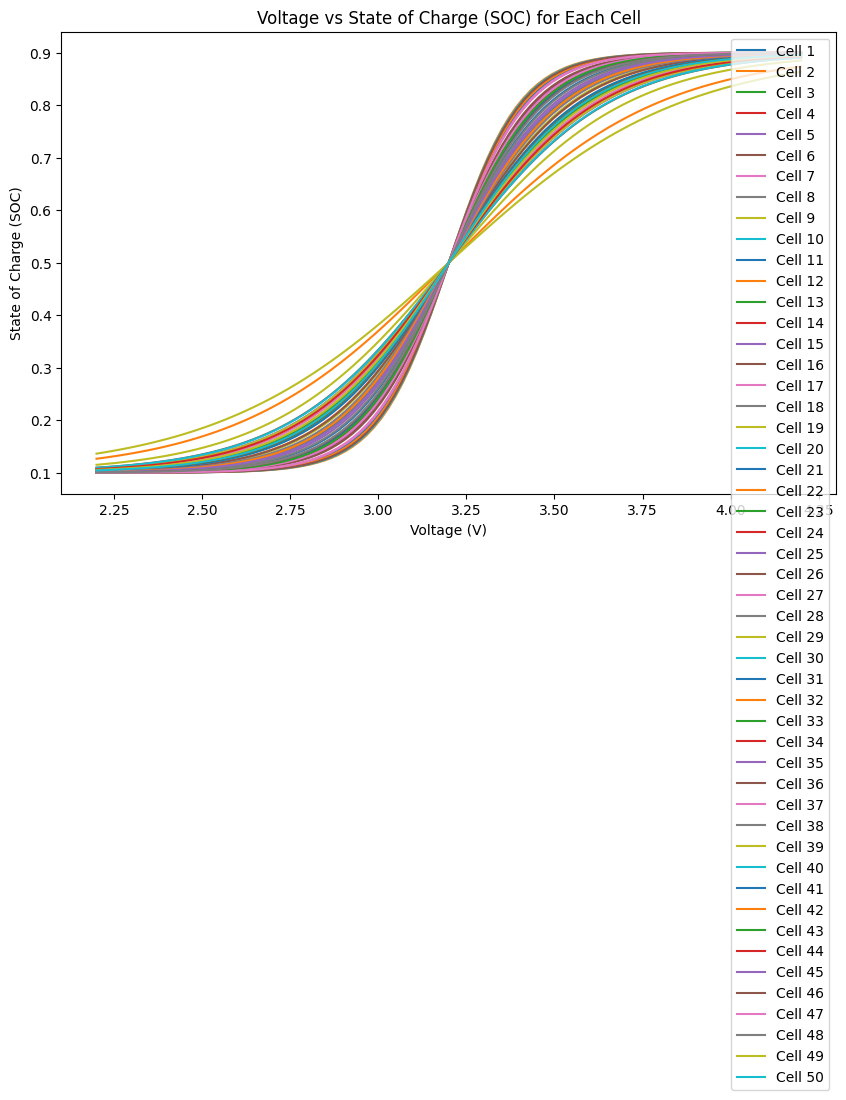

In [17]:
plot_voltage_vs_soc(bms)

In [18]:
T = 25_000

# Always disconected (All the batteries stay still)

In [ ]:
bms.reset()
states_1 = [bms.state]
states_soc_1 = [bms.state_soc]
actions_1 = []
rewards_1 = []
dones_1 = [False]
actions_int_1 = []

while not dones_1[-1] and len(states_1) < T:
    action = 0
    actions_int_1.append(action)
    state, reward, done, _, _ = bms.step(action)
    states_1.append(state)
    states_soc_1.append(bms.state_soc)
    actions_1.append(bms.int_action_to_switch_action(action))
    rewards_1.append(reward)
    dones_1.append(done)

print(f"Sum of rewards: {np.sum(rewards_1)}")

Sum of rewards: -1999900


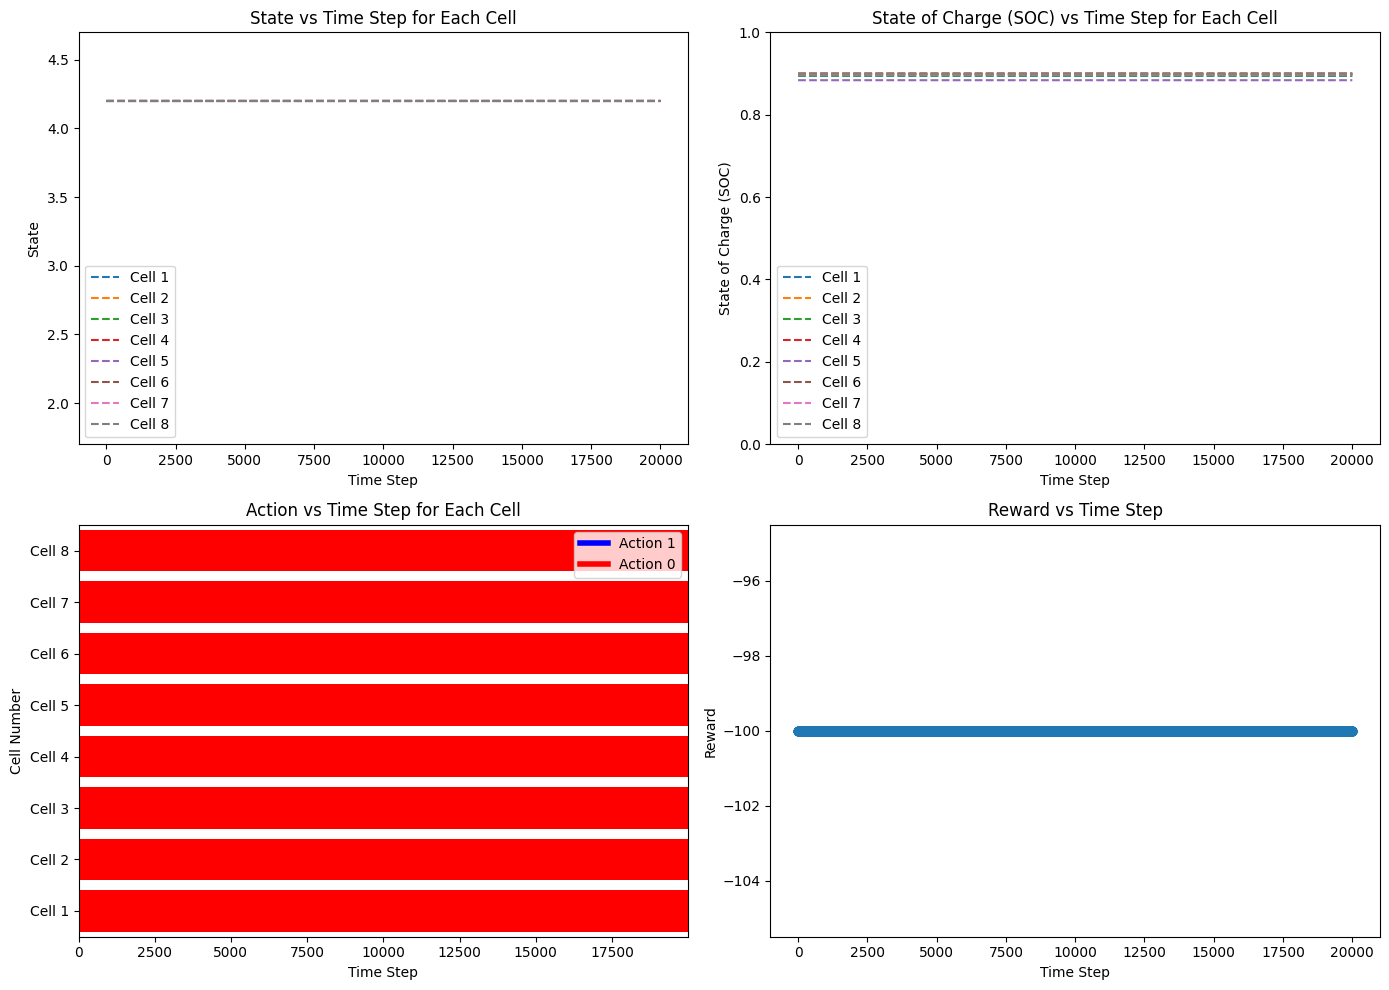

In [ ]:
plot_bms_evolution(bms, states_1, states_soc_1, actions_1, rewards_1, dones_1, include_bad_rewards=True)

# Always connected (All the batteries Discharge)

In [ ]:
bms.reset()
states_2 = [bms.state]
states_soc_2 = [bms.state_soc]
actions_2 = []
rewards_2 = []
dones_2 = [False]
actions_int_2 = []

while not dones_2[-1] and len(states_2) < T:
    action = bms.num_cells - 1
    actions_int_2.append(action)
    state, reward, done, _, _ = bms.step(action)
    states_2.append(state)
    states_soc_2.append(bms.state_soc)
    actions_2.append(bms.int_action_to_switch_action(action))
    rewards_2.append(reward)
    dones_2.append(done)

print(f"Sum of rewards: {np.sum(rewards_2)}")

Sum of rewards: -26.68040528176582


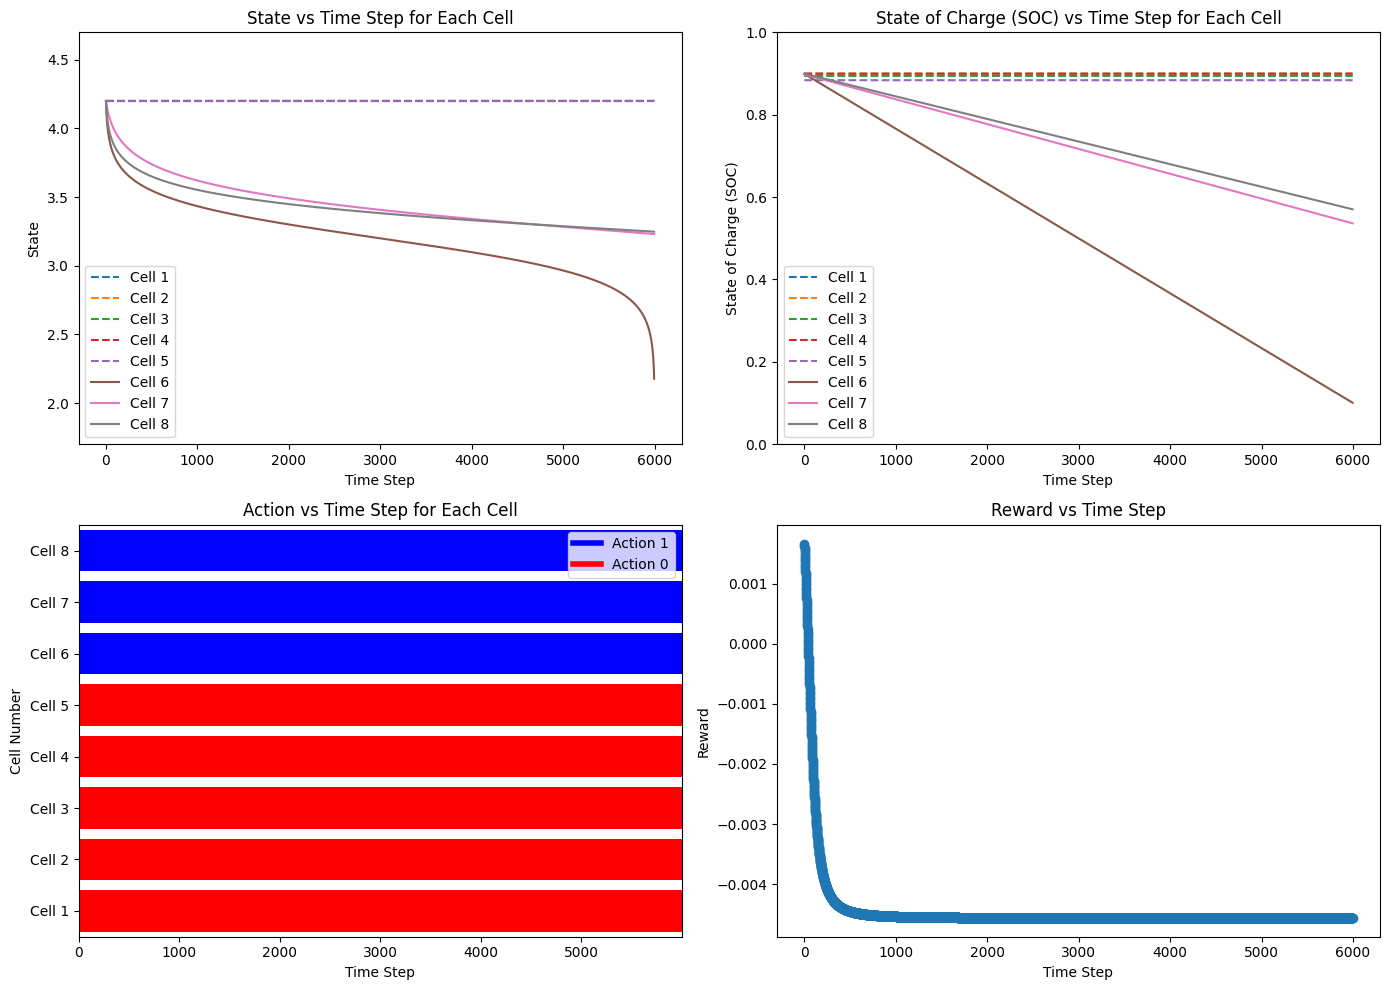

In [ ]:
plot_bms_evolution(bms, states_2, states_soc_2, actions_2, rewards_2, dones_2)

# Cell 2 always discharging and Cell 1 always disconnected (still)

In [ ]:
bms.reset()
states_3 = [bms.state]
states_soc_3 = [bms.state_soc]
actions_3 = []
rewards_3 = []
dones_3 = [False]
actions_int_3 = []

while not dones_3[-1] and len(states_3) < T:
    action = 1
    actions_int_3.append(action)
    state, reward, done, _, _ = bms.step(action)
    states_3.append(state)
    states_soc_3.append(bms.state_soc)
    actions_3.append(bms.int_action_to_switch_action(action))
    rewards_3.append(reward)
    dones_3.append(done)

print(f"Sum of rewards: {np.sum(rewards_3)}")

Sum of rewards: -100.32442738011729


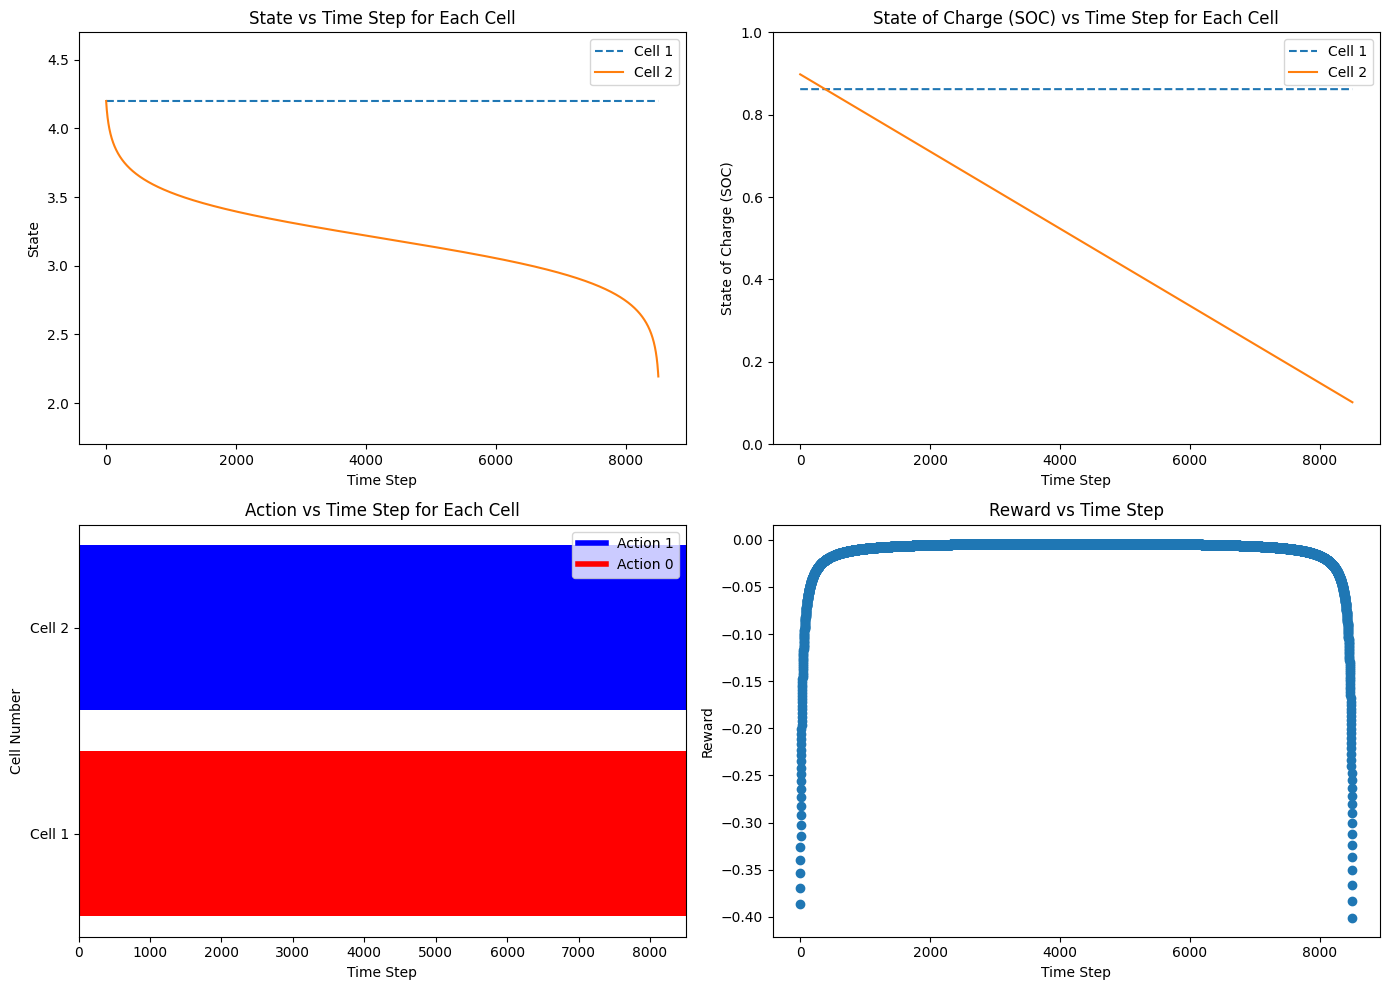

In [ ]:
plot_bms_evolution(bms, states_3, states_soc_3, actions_3, rewards_3, dones_3)

# Cell 1 always discharging and Cell 2 always disconnected (still)

In [6]:
bms.reset()
states_4 = [bms.state]
states_soc_4 = [bms.state_soc]
actions_4 = []
rewards_4 = []
dones_4 = [False]
actions_int_4 = []

while not dones_4[-1] and len(states_4) < T:
    action = 2
    actions_int_4.append(action)
    state, reward, done, _, _ = bms.step(action)
    states_4.append(state)
    states_soc_4.append(bms.state_soc)
    actions_4.append(bms.int_action_to_switch_action(action))
    rewards_4.append(reward)
    dones_4.append(done)

print(f"Sum of rewards: {np.sum(rewards_4)}")

AttributeError: 'int' object has no attribute 'copy'

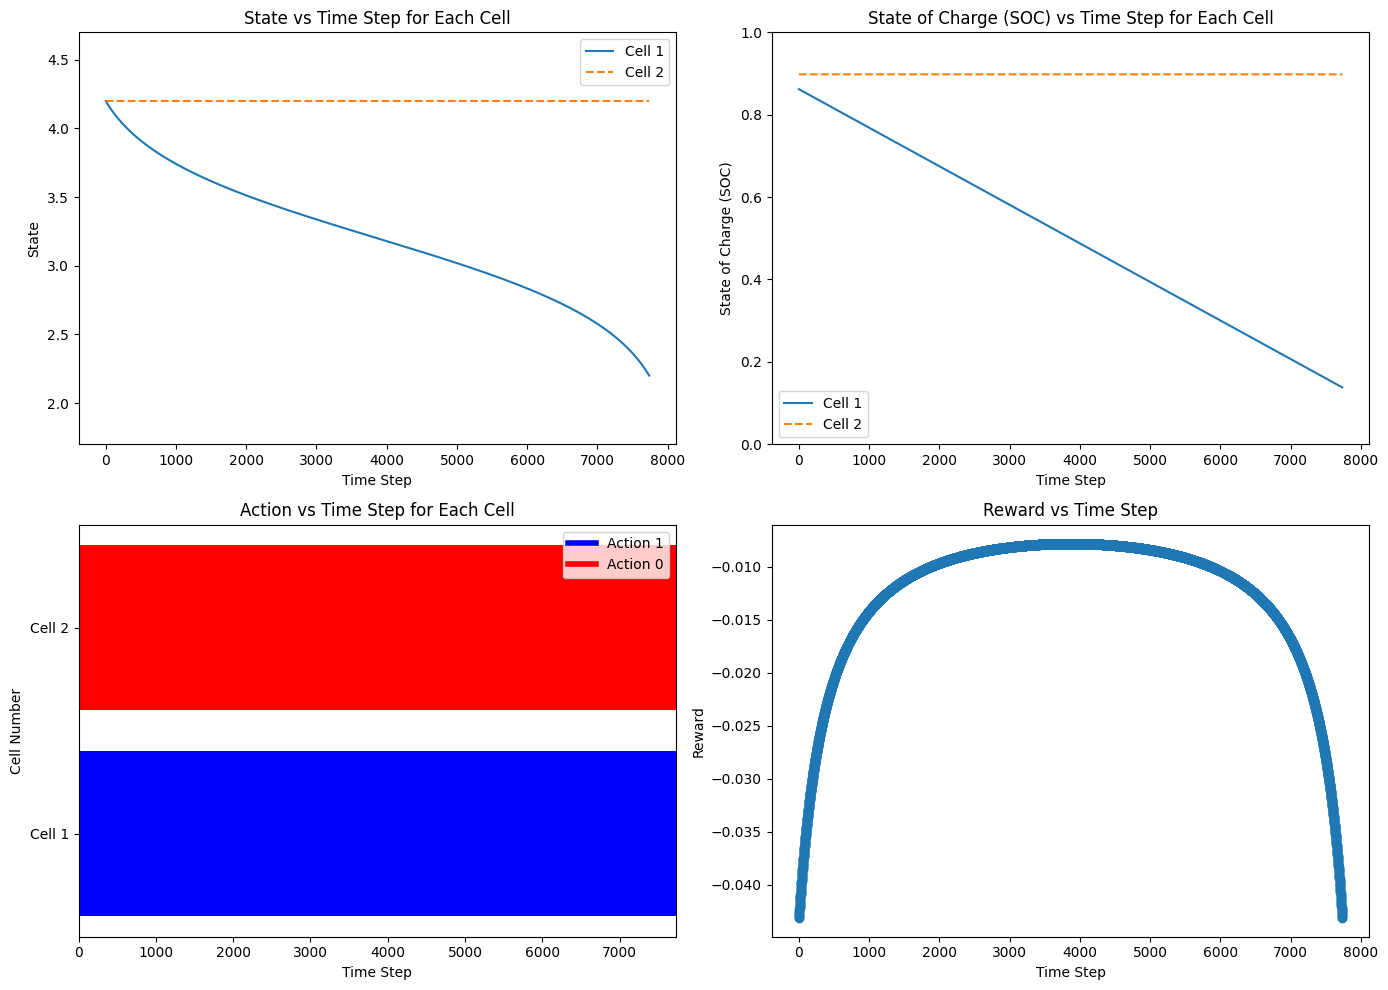

In [ ]:
plot_bms_evolution(bms, states_4, states_soc_4, actions_4, rewards_4, dones_4)

# Random Controller

In [27]:
bms.reset()
states_5 = [bms.state]
states_soc_5 = [bms.state_soc]
actions_5 = []
rewards_5 = []
dones_5 = [False]
actions_int_5 = []

while not dones_5[-1] and len(states_5) < T:
    action = bms.action_space.sample()
    # while action == 0:
    #     action = bms.action_space.sample()
    actions_int_5.append(bms.switch_action_to_int_action(action))
    state, reward, done, _, _ = bms.step(action)
    states_5.append(state)
    states_soc_5.append(bms.state_soc)
    actions_5.append(action)
    rewards_5.append(reward)
    dones_5.append(done)

print(f"Sum of rewards: {np.sum(rewards_5)}")

Sum of rewards: -15.520920514368026


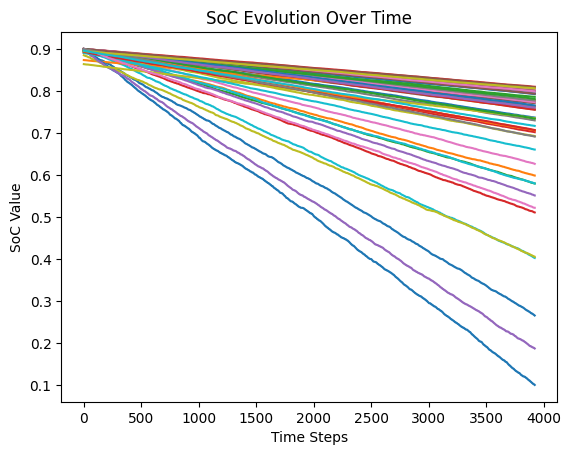

In [28]:
# Convert list of arrays to a 2D array for easier plotting
data_array = np.array(states_soc_5)

# Plot each feature over time
for feature_idx in range(bms.num_cells):
    plt.plot(range(len(data_array)), data_array[:, feature_idx], label=f'Feature {feature_idx + 1}')

plt.xlabel('Time Steps')
plt.ylabel('SoC Value')
plt.title('SoC Evolution Over Time')
# plt.legend()
plt.show()

In [21]:
plot_bms_evolution(bms, states_5, states_soc_5, actions_5, rewards_5, dones_5, include_bad_rewards=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7d84e1f8f010> (for post_execute):


KeyboardInterrupt: 

In [49]:
# Generate x-ticks
x_ticks = np.arange(2**bms.num_cells)

# Generate corresponding action arrays
x_tick_labels = [bms.int_action_to_switch_action(action).tolist() for action in x_ticks]

# Plot the histogram
plt.hist(actions_int_5, bins=np.arange(2**bms.num_cells + 1) - 0.5, edgecolor='black')
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.title('Histogram of Actions Taken by Random Controller')

# Set x-ticks and their labels
plt.xticks(x_ticks, x_tick_labels, rotation=90)  # Rotate labels for better readability

plt.grid(True)
plt.show();

KeyboardInterrupt: 

# TABULAR Q-Learning

In [21]:
bins = np.array([2.2, 2.5, 2.8, 3, 3.15, 3.30 , 3.40, 3.50 , 3.65, 3.80, 4.0 ,4.2])



In [22]:
bins

array([2.2 , 2.5 , 2.8 , 3.  , 3.15, 3.3 , 3.4 , 3.5 , 3.65, 3.8 , 4.  ,
       4.2 ])

In [23]:
print(bms.int_action_to_switch_action(0))
print(bms.int_action_to_switch_action(1))
print(bms.int_action_to_switch_action(2))
print(bms.int_action_to_switch_action(3))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1]


In [24]:
state_count, action_count = (len(bins) - 1)**bms.num_cells, 2**bms.num_cells
state_count, action_count
Q = np.zeros((state_count, action_count))
Q[:, 0] = -100

bms.reset()
states_6= [bms.state]
states_soc_6 = [bms.state_soc]
actions_6 = []
rewards_6 = []
dones_6 = [False]
random_actions_6 = []
actions_int_6 = []
states_int_6 = [features_to_unique_integer(states_6[-1], bins)]

epsilon = 0.0
stepsize = 0.5
gamma = 0.99

while not dones_6[-1] and len(states_6) < T:

    state_int  = features_to_unique_integer(states_6[-1], bins)

    if np.random.uniform(0, 1) < epsilon:
        random_actions_6.append(True)
        action = bms.action_space.sample()
        # while action == 0:
        #     action = bms.action_space.sample()
    else:
        random_actions_6.append(False)
        # action = np.argmax(Q[state_int, :])
        max_indices = np.flatnonzero(Q[state_int, :] == Q[state_int, :].max())
        action = np.random.choice(max_indices)
        action = bms.int_action_to_switch_action(action)

    action_int = bms.switch_action_to_int_action(action)
    actions_int_6.append(action_int)

    state, reward, done, _ , _= bms.step(action)
    states_6.append(state)
    states_soc_6.append(bms.state_soc)
    actions_6.append(action)
    rewards_6.append(reward)
    dones_6.append(done)


    if not done:
        next_state_int = features_to_unique_integer(state, bins)
        states_int_6.append(next_state_int)
        Q[state_int, action_int] = Q[state_int, action_int] + stepsize * (reward + gamma * np.max(Q[next_state_int, :]) - Q[state_int, action_int])


print(f"Sum of rewards: {np.sum(rewards_6)}")

ValueError: Maximum allowed dimension exceeded

In [29]:
plot_bms_evolution(bms, states_6, states_soc_6, actions_6, rewards_6, dones_6, include_bad_rewards=True)

NameError: name 'states_6' is not defined

# Efficient Tabular Q-Learning

In [29]:

# Assuming bms, bins, T, and other relevant variables/functions are already defined

# Initialize the Q-table with a default value of 0.0 for each (state, action) pair
init_Q_value = 0.0
Q = defaultdict(lambda: init_Q_value)

bms.reset()
states_6 = [bms.state]
states_soc_6 = [bms.state_soc]
actions_6 = []
rewards_6 = []
dones_6 = [False]
random_actions_6 = []
actions_int_6 = []
states_int_6 = [tuple(discretize_features(states_6[-1], bins))]

epsilon = 0.0
stepsize = 0.5
gamma = 0.99

while not dones_6[-1] and len(states_6) < T:
    state_int = tuple(discretize_features(states_6[-1], bins))

    if np.random.uniform(0, 1) < epsilon:
        random_actions_6.append(True)
        action = bms.action_space.sample()
    else:
        random_actions_6.append(False)
        # Collect all actions with non-zero Q-values for the current state
        state_actions = [(s, a) for (s, a) in Q.keys() if s == state_int]

        if state_actions:
            max_q_value = max(Q[(state_int, a)] for _, a in state_actions)
            max_actions = [a for _, a in state_actions if Q[(state_int, a)] == max_q_value]
            action_int = random.choice(max_actions)
            action = np.array(action_int)
            if max_q_value < init_Q_value:
                action = bms.action_space.sample()
        else:
            action = bms.action_space.sample()

    action_int = tuple(action)
    actions_int_6.append(action_int)

    state, reward, done, _, _ = bms.step(action)
    states_6.append(state)
    states_soc_6.append(bms.state_soc)
    actions_6.append(action)
    rewards_6.append(reward)
    dones_6.append(done)

    if not done:
        next_state_int = tuple(discretize_features(state, bins))
        states_int_6.append(next_state_int)
        next_state_actions = [(s, a) for (s, a) in Q.keys() if np.all(s == next_state_int)]
        if next_state_actions:
            max_next_q_value = max(Q[(next_state_int, a)] for _, a in next_state_actions)
        else:
            max_next_q_value = 0.0
        Q[(state_int, action_int)] = Q[(state_int, action_int)] + stepsize * (
            reward + gamma * max_next_q_value - Q[(state_int, action_int)]
        )

print(f"Sum of rewards: {np.sum(rewards_6)}")


Sum of rewards: -14.513418416515677


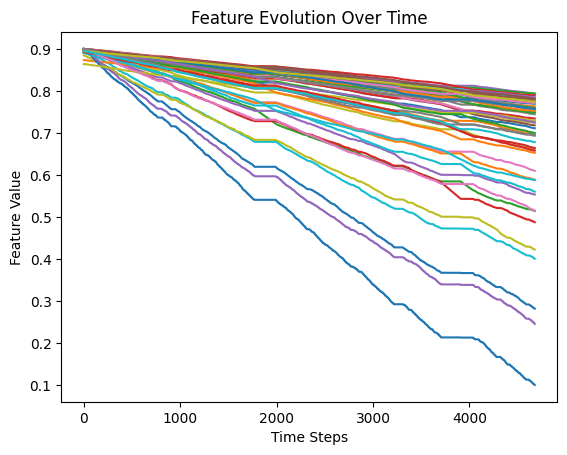

In [30]:

# Convert list of arrays to a 2D array for easier plotting
data_array = np.array(states_soc_6)

# Plot each feature over time
for feature_idx in range(bms.num_cells):
    plt.plot(range(len(data_array)), data_array[:, feature_idx], label=f'Feature {feature_idx + 1}')

plt.xlabel('Time Steps')
plt.ylabel('Feature Value')
plt.title('Feature Evolution Over Time')
# plt.legend()
plt.show()

In [32]:
Q

defaultdict(<function __main__.<lambda>()>,
            {((10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10,
               10),
     

In [62]:
# Assuming bms, bins, T, and other relevant variables/functions are already defined

# Use defaultdict to store Q-values with default value 0.0 for each (state, action) pair
init_Q_value = 0.0
Q = defaultdict(lambda: init_Q_value)

bms.reset()
states_6 = [bms.state]
states_soc_6 = [bms.state_soc]
actions_6 = []
rewards_6 = []
dones_6 = [False]
random_actions_6 = []
actions_int_6 = []
states_int_6 = [features_to_unique_integer(states_6[-1], bins)]

epsilon = 0.0
stepsize = 0.5
gamma = 0.99

while not dones_6[-1] and len(states_6) < T:
    state_int = features_to_unique_integer(states_6[-1], bins)

    if np.random.uniform(0, 1) < epsilon:
        random_actions_6.append(True)
        action = bms.action_space.sample()
    else:
        random_actions_6.append(False)
        # Collect all actions with non-zero Q-values for the current state
        state_actions = [(s, a) for (s, a) in Q.keys() if s == state_int]

        if state_actions:
            max_q_value = max(Q[(state_int, a)] for _, a in state_actions)
            max_actions = [a for _, a in state_actions if Q[(state_int, a)] == max_q_value]
            action_int = random.choice(max_actions)
            action = bms.int_action_to_switch_action(action_int)
            if max_q_value < init_Q_value:
                action = bms.action_space.sample()
        else:
            action = bms.action_space.sample()
            # Default action if no actions are present in Q for this state


    action_int = bms.switch_action_to_int_action(action)
    actions_int_6.append(action_int)

    state, reward, done, _, _ = bms.step(action)
    states_6.append(state)
    states_soc_6.append(bms.state_soc)
    actions_6.append(action)
    rewards_6.append(reward)
    dones_6.append(done)

    if not done:
        next_state_int = features_to_unique_integer(state, bins)
        states_int_6.append(next_state_int)
        next_state_actions = [(s, a) for (s, a) in Q.keys() if s == next_state_int]
        if next_state_actions:
            max_next_q_value = max(Q[(next_state_int, a)] for _, a in next_state_actions)
        else:
            max_next_q_value = 0.0
        Q[(state_int, action_int)] = Q[(state_int, action_int)] + stepsize * (
            reward + gamma * max_next_q_value - Q[(state_int, action_int)]
        )

print(f"Sum of rewards: {np.sum(rewards_6)}")


KeyboardInterrupt: 

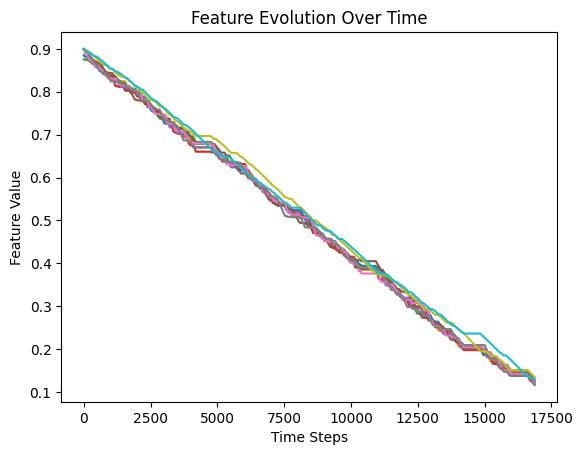

In [41]:
Q

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


defaultdict(<function __main__.<lambda>()>,
            {(11739085287969531650666649599035776653665992770068152,
              365391611387019): 0.00039623401940123244,
             (11739085287969531650666649599028376403721734609966941,
              15631941487729): 0.00022928557269191047,
             (11739085287969528840422964792603591342507831256562090,
              337490662801852): 0.0005756577544500062,
             (11739078661561921103781860892342974273249705852913049,
              536434149637609): -0.0004645165752098848,
             (11739078661561921101670483217807718987704090598703128,
              822951066149883): 0.00029831427972330446,
             (11739078661561921101670483217807718987704090596931567,
              128472758878688): -0.00019867730191467856,
             (11739078661561921101670483217807718987704090596931567,
              661170892475978): 0.0001404314980305538,
             (11739078661561921101670483217807718983526842427515916,
              

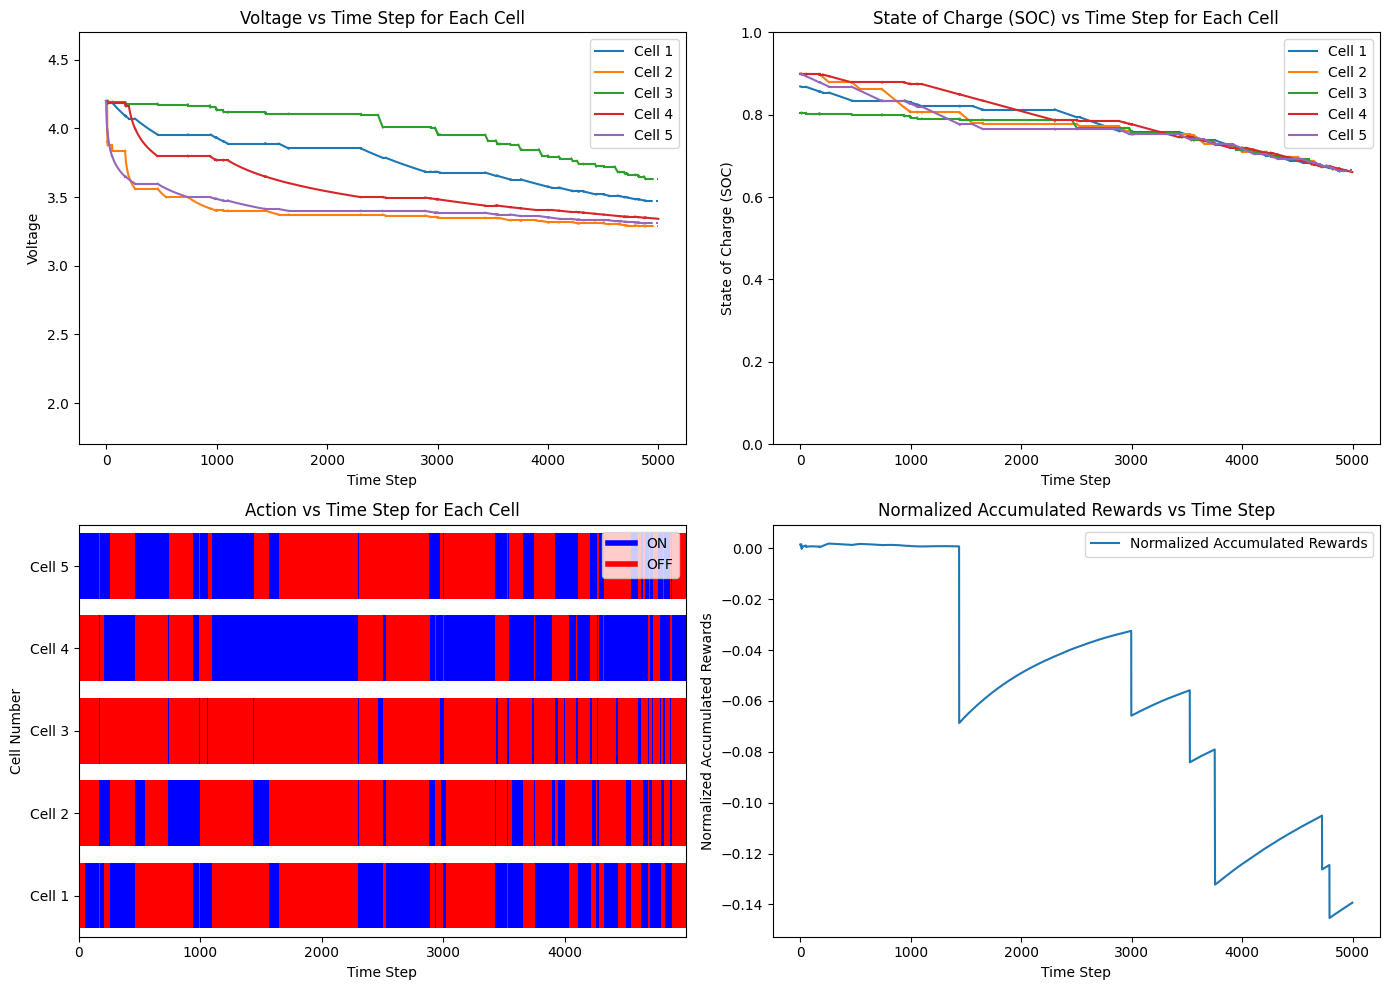

In [16]:
plot_bms_evolution(bms, states_6, states_soc_6, actions_6, rewards_6, dones_6, include_bad_rewards=True)

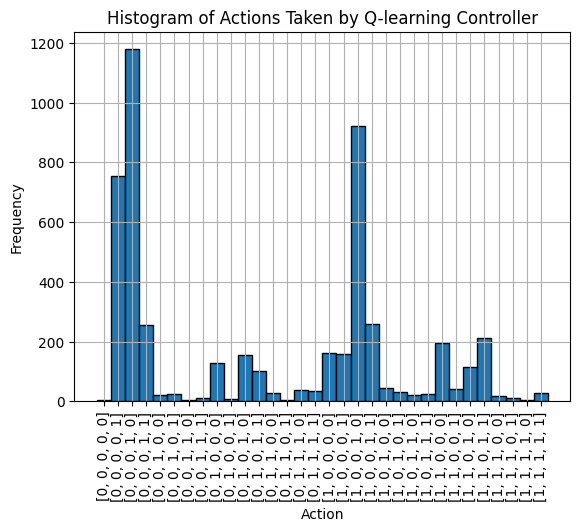

In [26]:
# Generate x-ticks
x_ticks = np.arange(2**bms.num_cells)

# Generate corresponding action arrays
x_tick_labels = [bms.int_action_to_switch_action(action).tolist() for action in x_ticks]

# Plot the histogram
plt.hist(actions_int_6, bins=np.arange(2**bms.num_cells + 1) - 0.5, edgecolor='black')
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.title('Histogram of Actions Taken by Q-learning Controller')

# Set x-ticks and their labels
plt.xticks(x_ticks, x_tick_labels, rotation=90)  # Rotate labels for better readability

plt.grid(True)
plt.show();

In [22]:
# state_count = (len(bins) - 1) ** bms.num_cells

# # Use defaultdict to store Q-values
# Q = defaultdict(lambda: [0] + [0] * (action_count - 1))

# bms.reset()
# states_6 = [bms.state]
# states_soc_6 = [bms.state_soc]
# actions_6 = []
# rewards_6 = []
# dones_6 = [False]
# random_actions_6 = []
# actions_int_6 = []
# states_int_6 = [features_to_unique_integer(states_6[-1], bins)]

# epsilon = 0.0
# stepsize = 0.5
# gamma = 0.99

# while not dones_6[-1] and len(states_6) <  T:

#     state_int = features_to_unique_integer(states_6[-1], bins)

#     if np.random.uniform(0, 1) < epsilon:
#         random_actions_6.append(True)
#         action = bms.action_space.sample()
#     else:
#         random_actions_6.append(False)
#         # Find the maximum Q-value
#         q_values = Q[state_int]
#         max_q_value = np.max(q_values)
#         # Identify all actions with the maximum Q-value
#         max_actions = [a for a, q in enumerate(q_values) if q == max_q_value]
#         # Randomly choose one of the actions with the maximum Q-value
#         action = random.choice(max_actions)
#         action = bms.int_action_to_switch_action(action)

#     action_int = bms.switch_action_to_int_action(action)
#     actions_int_6.append(action_int)

#     state, reward, done, _, _ = bms.step(action)
#     states_6.append(state)
#     states_soc_6.append(bms.state_soc)
#     actions_6.append(action)
#     rewards_6.append(reward)
#     dones_6.append(done)

#     if not done:
#         next_state_int = features_to_unique_integer(state, bins)
#         states_int_6.append(next_state_int)
#         Q[state_int][action_int] = Q[state_int][action_int] + stepsize * (
#             reward + gamma * max(Q[next_state_int]) - Q[state_int][action_int]
#         )

# print(f"Sum of rewards: {np.sum(rewards_6)}")


In [23]:
# plot_bms_evolution(bms, states_6, states_soc_6, actions_6, rewards_6, dones_6, include_bad_rewards=True)

# DQN

In [ ]:
bms.reset()
# Check if the environment follows the gym interface
check_env(bms)

In [ ]:

# Define the DQN model
# model = DQN('MlpPolicy', bms, verbose=1, exploration_initial_eps = 0.01,
#              exploration_final_eps = 0.01, batch_size= 128, target_update_interval= 5_000)

model = DQN('MlpPolicy', bms, verbose=1, exploration_initial_eps= 0.001,
             exploration_final_eps=0.001, batch_size= 500, target_update_interval= 2_000, learning_rate= 0.0001)

# Train the model
# Note: Start with high epsilon for exploration and gradually reduce it for exploitation.
model.learn(total_timesteps= 250_000)

# Save the model
model.save("dqn_bms")



Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.32e+04 |
|    ep_rew_mean      | -120     |
|    exploration_rate | 0.001    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 578      |
|    time_elapsed     | 91       |
|    total_timesteps  | 52798    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000222 |
|    n_updates        | 13174    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.24e+04 |
|    ep_rew_mean      | -125     |
|    exploration_rate | 0.001    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 586      |
|    time_elapsed     | 169      |
|    total_timesteps  | 99273    |
| train/              |        

In [ ]:
# Load the model
model = DQN.load("dqn_bms")

# Evaluate the model
bms.reset()
states_7 = [bms.state]
states_soc_7 = [bms.state_soc]
actions_7 = []
rewards_7 = []
dones_7 = [False]
actions_int_7 = []

while not dones_7[-1] and len(states_7) <  T:
    action, _ = model.predict(bms.state)
    actions_int_7.append(action)
    state_7, reward_7, done_7, _ , _= bms.step(action)
    states_7.append(state_7)
    states_soc_7.append(bms.state_soc)
    actions_7.append(bms.int_action_to_switch_action(action))
    rewards_7.append(reward_7)
    dones_7.append(done_7)

print(f"Sum of rewards: {np.sum(rewards_7)}")

Sum of rewards: -159.64889290853023


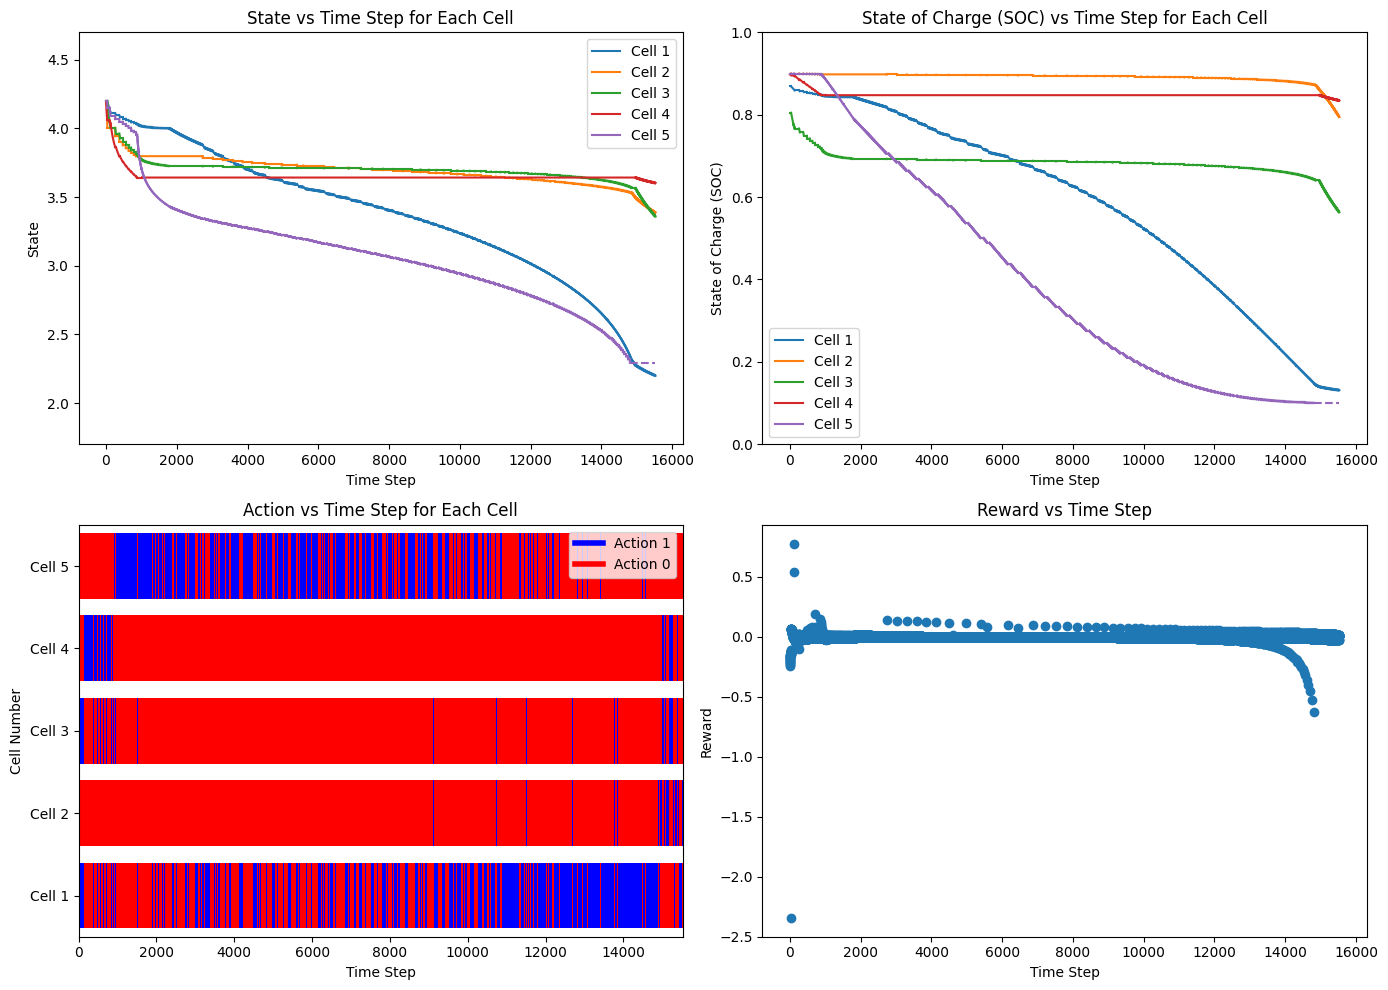

In [ ]:
plot_bms_evolution(bms, states_7, states_soc_7, actions_7, rewards_7, dones_7)